In [81]:
# Data tools
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# ML tools
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm

### Load cleaned training data

In [18]:
data_train = pd.read_csv('data_train_clean.csv')
nrows_train, ncols_train = data_train.shape
print(f"Training dataset has {nrows_train} rows and {ncols_train} columns")

Training dataset has 159120 rows and 43 columns


In [3]:
data.describe()

,Permit Type,Street Number,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode,Record ID,Filed Days,Issued Days,Issued or not,Days to issue
count,159120.000000,159120.000000,23571.000000,124975.000000,124912.000000,1.287550e+05,1.543180e+05,117952.000000,118451.000000,159120.000000,159120.000000,159120.000000,157760.000000,157760.000000,1.591200e+05,159120.000000,147226.000000,159120.000000,147226.000000
mean,7.523033,1121.984615,78.061941,5.704909,5.748119,1.776544e+05,1.396427e+05,15.552236,16.443947,1.740284,3.185414,3.202545,5.541557,94115.507042,1.162524e+12,968.921437,973.138236,0.925251,26.202980
std,1.456435,1135.655030,323.361038,8.592910,8.598126,3.920941e+06,3.867726e+06,73.233051,74.035060,1.397578,2.189130,2.188812,2.885742,9.284674,4.912923e+11,539.029506,536.279454,0.262986,91.586112
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,94102.000000,1.293532e+10,1.000000,1.000000,0.000000,0.000000
25%,8.000000,235.000000,0.000000,2.000000,2.000000,3.311000e+03,1.000000e+00,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,94109.000000,1.308561e+12,512.000000,520.000000,1.000000,0.000000
50%,8.000000,711.000000,0.000000,3.000000,3.000000,1.100000e+04,7.000000e+03,1.000000,2.000000,2.000000,5.000000,5.000000,6.000000,94114.000000,1.371854e+12,980.000000,986.000000,1.000000,0.000000
75%,8.000000,1700.000000,1.000000,4.000000,4.000000,3.560000e+04,2.900000e+04,4.000000,4.000000,2.000000,5.000000,5.000000,8.000000,94122.000000,1.434867e+12,1434.000000,1431.000000,1.000000,6.000000
max,8.000000,8400.000000,6004.000000,78.000000,78.000000,5.379586e+08,7.805000e+08,1907.000000,1911.000000,4.000000,5.000000,5.000000,11.000000,94158.000000,1.498342e+12,1879.000000,1879.000000,1.000000,1734.000000


### Load cleaned testing data

In [19]:
data_test = pd.read_csv('data_test_clean.csv')
nrows_test, ncols_test = data_test.shape
print(f"Testing dataset has {nrows_test} rows and {ncols_test} columns")

Training dataset has 39780 rows and 43 columns


In [98]:
data_test.describe()

,Permit Type,Street Number,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode,Record ID,Filed Days,Issued Days,Issued or not,Days to issue
count,39780.000000,39780.000000,5908.000000,31141.000000,31120.000000,3.207900e+04,3.851600e+04,29410.000000,29538.000000,39780.000000,39780.000000,39780.000000,39423.000000,39424.000000,3.978000e+04,39780.000000,36734.000000,39780.000000,36734.000000
mean,7.519482,1120.706259,80.333446,5.709242,5.732696,1.340407e+05,1.056654e+05,16.123087,16.779640,1.741001,3.182705,3.200251,5.525784,94115.474609,1.160142e+12,976.296254,980.376218,0.923429,25.460391
std,1.461523,1136.238212,341.065014,8.695553,8.673987,2.090947e+06,2.098990e+06,79.266563,79.798033,1.402760,2.191744,2.191576,2.892233,9.211779,4.939345e+11,539.360158,536.428025,0.265913,88.927710
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,94102.000000,1.301155e+10,1.000000,1.000000,0.000000,0.000000
25%,8.000000,235.000000,0.000000,2.000000,2.000000,3.150000e+03,1.000000e+00,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,94109.000000,1.308592e+12,521.000000,527.000000,1.000000,0.000000
50%,8.000000,709.500000,0.000000,3.000000,3.000000,1.100000e+04,7.000000e+03,1.000000,2.000000,2.000000,5.000000,5.000000,6.000000,94114.000000,1.371799e+12,989.000000,996.000000,1.000000,0.000000
75%,8.000000,1690.000000,1.000000,4.000000,4.000000,3.500000e+04,2.785800e+04,4.000000,4.000000,2.000000,5.000000,5.000000,8.000000,94122.000000,1.435691e+12,1443.000000,1443.000000,1.000000,6.000000
max,8.000000,8400.000000,5903.000000,63.000000,63.000000,1.750000e+08,2.076800e+08,1907.000000,1907.000000,4.000000,5.000000,5.000000,11.000000,94158.000000,1.498331e+12,1879.000000,1879.000000,1.000000,1740.000000


### Step 1: Predict whether a permit will be issued or not

In [84]:
y_train = data_train["Issued or not"]
print("Number of NA values in y_train: ", end='')
print(y_train.isna().sum())

Number of NA values in y_train: 0


#### Check which columns have NA values

In [99]:
data_train.isnull().any()

Permit Number                          False
Permit Type                            False
Permit Creation Date                   False
Block                                  False
Lot                                    False
Street Number                          False
Street Number Suffix                    True
Street Name                            False
Street Suffix                           True
Unit                                    True
Unit Suffix                             True
Description                             True
Current Status                         False
Current Status Date                    False
Filed Date                             False
Issued Date                             True
Completed Date                          True
First Construction Document Date        True
Structural Notification                False
Number of Existing Stories              True
Number of Proposed Stories              True
Voluntary Soft-Story Retrofit          False
Fire Only 

#### Fill in missing values in feature space

In [154]:
data_train = data_train.fillna(method='ffill')
data_test = data_test.fillna(method='ffill')

nrows_train, ncols_train = data_train.shape
print(f"Training dataset has {nrows_train} rows and {ncols_train} columns")

nrows_test, ncols_test = data_test.shape
print(f"Testing dataset has {nrows_test} rows and {ncols_test} columns")

Training dataset has 159120 rows and 43 columns
Testing dataset has 39780 rows and 43 columns


In [187]:
y_train = data_train["Issued or not"]
nrows_train = y_train.shape

nb_classes = 9
targets = data_train["Permit Type"].to_numpy().reshape(-1)
one_hot_targets = np.eye(nb_classes)[targets]
print(one_hot_targets)

X_train = np.column_stack((
    np.ones(nrows_train), #Intercept
    one_hot_targets,
    data_train["Plansets"].to_numpy()
))
X_train

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


array([[1., 0., 0., ..., 0., 1., 2.],
       [1., 0., 0., ..., 0., 1., 2.],
       [1., 0., 0., ..., 0., 1., 2.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 2.]])

In [188]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [190]:
y_test = data_test["Issued or not"]
nrows_test = y_test.shape

nb_classes = 9
targets = data_test["Permit Type"].to_numpy().reshape(-1)
one_hot_targets = np.eye(nb_classes)[targets]
print(one_hot_targets)

X_test = np.column_stack((
    np.ones(nrows_test), #Intercept
    one_hot_targets,
))
X_test

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


array([[1., 0., 0., ..., 0., 1., 4.],
       [1., 0., 0., ..., 0., 1., 2.],
       [1., 0., 0., ..., 0., 1., 4.],
       ...,
       [1., 0., 0., ..., 0., 1., 4.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 2.]])

In [191]:
y_pred = regressor.predict(X_test)

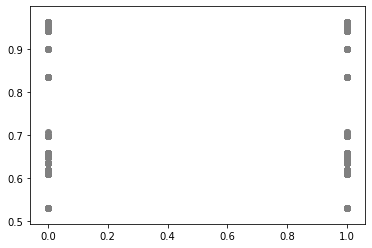

In [192]:
plt.scatter(y_test, y_pred,  color='gray')
plt.show()

In [193]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.12411473285258866
Mean Squared Error: 0.062473399999472226
Root Mean Squared Error: 0.24994679433725936


### Clearly this should use a binary classification instead...

In [194]:
SVM = svm.LinearSVC()
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
round(SVM.score(X_train, y_train), 4)

0.9253

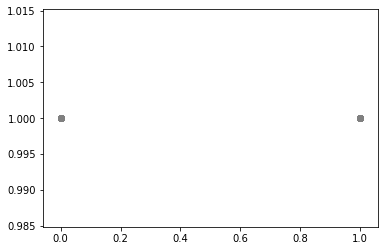

In [195]:
plt.scatter(y_test, y_pred,  color='gray')
plt.show()

In [196]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.07657114127702364
Mean Squared Error: 0.07657114127702364
Root Mean Squared Error: 0.27671490974832497


In [197]:
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
round(RF.score(X_train, y_train), 4)

0.9253

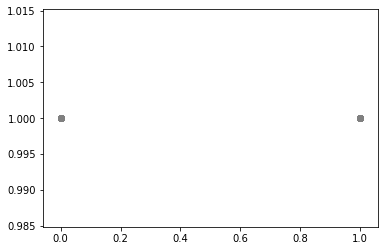

In [198]:
plt.scatter(y_test, y_pred,  color='gray')
plt.show()

In [199]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.07657114127702364
Mean Squared Error: 0.07657114127702364
Root Mean Squared Error: 0.27671490974832497


### Trying to add another feature

In [219]:
y_train = data_train["Issued or not"]
nrows_train = y_train.shape

nb_classes = 9
targets = data_train["Permit Type"].to_numpy().reshape(-1)
one_hot_targets_permit_type = np.eye(nb_classes)[targets]
print(one_hot_targets_permit_type)

nb_classes = 5
targets = data_train["Plansets"].to_numpy(dtype ='int').reshape(-1)
one_hot_targets_plansets = np.eye(nb_classes)[targets]
print(one_hot_targets_plansets)

X_train = np.column_stack((
    np.ones(nrows_train), #Intercept
    one_hot_targets_permit_type,
    one_hot_targets_plansets
))
X_train

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [220]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [221]:
y_test = data_test["Issued or not"]
nrows_test = y_test.shape

nb_classes = 9
targets = data_test["Permit Type"].to_numpy().reshape(-1)
one_hot_targets = np.eye(nb_classes)[targets]
print(one_hot_targets)

nb_classes = 5
targets = data_test["Plansets"].to_numpy(dtype ='int').reshape(-1)
one_hot_targets_plansets = np.eye(nb_classes)[targets]
print(one_hot_targets_plansets)

X_test = np.column_stack((
    np.ones(nrows_test), #Intercept
    one_hot_targets,
    one_hot_targets_plansets
))
X_test

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
[[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [222]:
y_pred = regressor.predict(X_test)

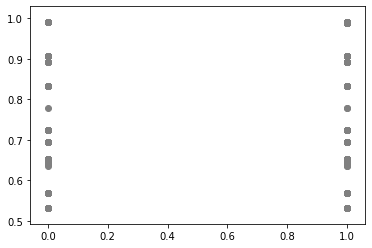

In [223]:
plt.scatter(y_test, y_pred,  color='gray')
plt.show()

In [224]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.12052479854716075
Mean Squared Error: 0.06083138049218444
Root Mean Squared Error: 0.24664018426076567


In [225]:
SVM = svm.LinearSVC()
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print(y_pred)
round(SVM.score(X_train, y_train), 4)

[1 1 1 ... 1 1 1]


0.9253

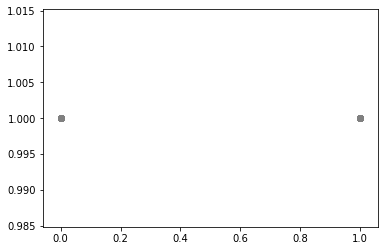

In [226]:
plt.scatter(y_test, y_pred,  color='gray')
plt.show()

In [227]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.07657114127702364
Mean Squared Error: 0.07657114127702364
Root Mean Squared Error: 0.27671490974832497


In [229]:
y_train = data_train["Issued or not"]
nrows_train = y_train.shape

nb_classes = 9
targets = data_train["Permit Type"].to_numpy().reshape(-1)
one_hot_targets_permit_type = np.eye(nb_classes)[targets]
print(one_hot_targets_permit_type)

nb_classes = 5
targets = data_train["Plansets"].to_numpy(dtype ='int').reshape(-1)
one_hot_targets_plansets = np.eye(nb_classes)[targets]
print(one_hot_targets_plansets)

nb_classes = 6
targets = data_train["Proposed Construction Type"].to_numpy(dtype ='int').reshape(-1)
one_hot_targets_proposed_construction_types = np.eye(nb_classes)[targets]
print(one_hot_targets_proposed_construction_types)

X_train = np.column_stack((
    np.ones(nrows_train), #Intercept
    one_hot_targets_permit_type,
    one_hot_targets_plansets,
    one_hot_targets_proposed_construction_types
))
X_train

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [230]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [231]:
y_test = data_test["Issued or not"]
nrows_test = y_test.shape

nb_classes = 9
targets = data_test["Permit Type"].to_numpy().reshape(-1)
one_hot_targets = np.eye(nb_classes)[targets]
print(one_hot_targets)

nb_classes = 5
targets = data_test["Plansets"].to_numpy(dtype ='int').reshape(-1)
one_hot_targets_plansets = np.eye(nb_classes)[targets]
print(one_hot_targets_plansets)

nb_classes = 6
targets = data_test["Proposed Construction Type"].to_numpy(dtype ='int').reshape(-1)
one_hot_targets_proposed_construction_types = np.eye(nb_classes)[targets]
print(one_hot_targets_proposed_construction_types)

X_test = np.column_stack((
    np.ones(nrows_test), #Intercept
    one_hot_targets,
    one_hot_targets_plansets,
    one_hot_targets_proposed_construction_types
))
X_test

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
[[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]]


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [232]:
y_pred = regressor.predict(X_test)

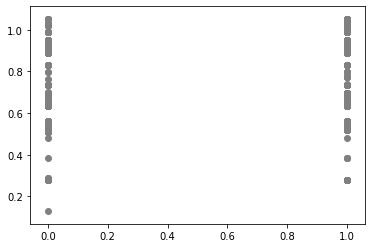

In [233]:
plt.scatter(y_test, y_pred,  color='gray')
plt.show()

In [234]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11924442024672073
Mean Squared Error: 0.05907665561979196
Root Mean Squared Error: 0.24305689790621446


In [235]:
SVM = svm.LinearSVC()
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print(y_pred)
round(SVM.score(X_train, y_train), 4)

[1 1 1 ... 1 1 1]


0.9247

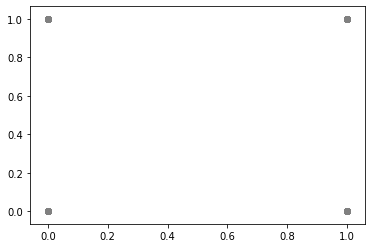

In [236]:
plt.scatter(y_test, y_pred,  color='gray')
plt.show()